# Advertising Sales Channel Prediction

# Data description

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored .

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue.

# Importing modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Import data from github link to analyse and build model for prediction.



# Exploratory Data Analysis

In [3]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

Checking data types.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Getting information about data like as null value, dtypes, Columns.



In [5]:
df.shape

(200, 5)

checking shape of data. As we are getting there are 200 rows and 5 columns.



In [6]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


checking statistical evaluation of all columns.



Drop "Unnamed :0" columns becasue this columns not related with our prediction.



In [7]:
#Checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

No NaN value present in any columns



In [8]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

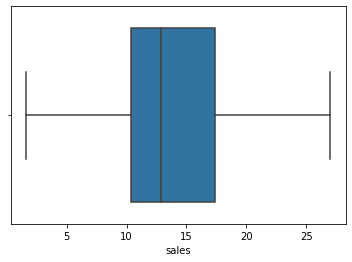

In [9]:
sns.boxplot(df['sales'])
plt.show()

As we can see most of the sales are between 10 to 18.

            ----> Let's see how Sales are related with other variables using scatter plot.



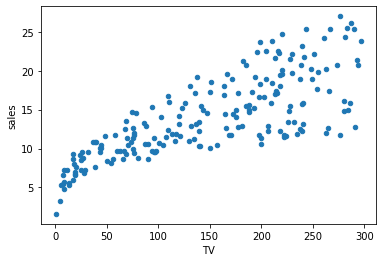

In [10]:
df.plot.scatter(x='TV',y='sales')

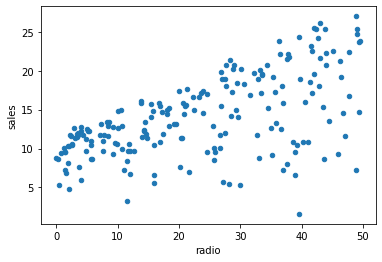

In [11]:
df.plot.scatter(x='radio',y='sales')

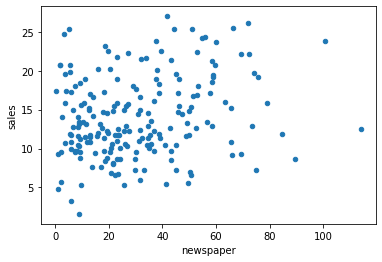

In [12]:
df.plot.scatter(x='newspaper',y='sales')

# Data Visualization

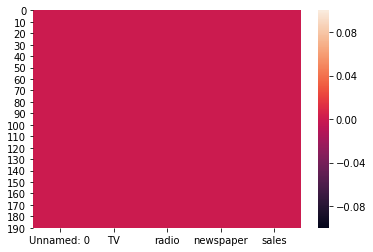

In [13]:
sns.heatmap(df.isnull())

# Summary Statistics

In [14]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Statistical Summary provide information about whole data statistically i.e. Count, Mean, Standard Deviation, Minimum value, 25%, 50% 75% and Maximum Value and statistical report is mentioned above

# Correlation

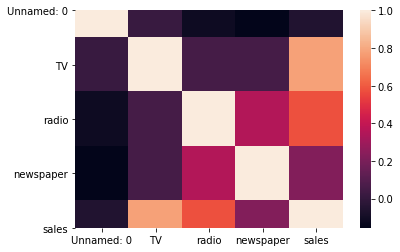

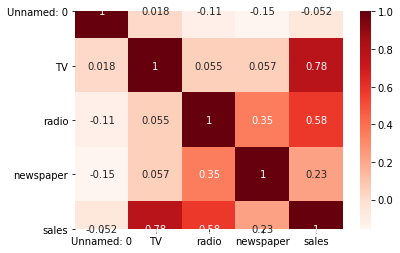

In [15]:
dfcor=df.corr()
dfcor
sns.heatmap(dfcor)
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Reds',annot=True)

Good correlation is present and all columns are highly correlated with each other.



# Univariate Analysis

Ploting Outliers by Box Plot

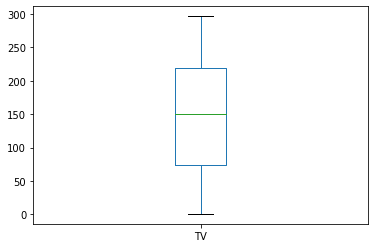

In [16]:
df['TV'].plot.box()

No Outliers are present in TV column.



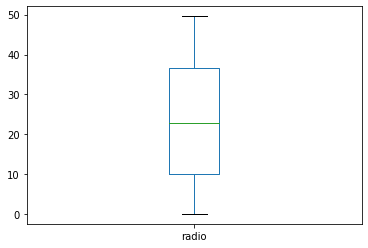

In [17]:
df['radio'].plot.box()

No Outliers are present in radio column.



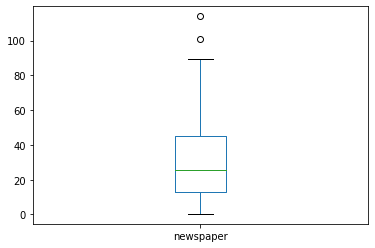

In [18]:
df['newspaper'].plot.box()

Outliers are present in newspaper column.



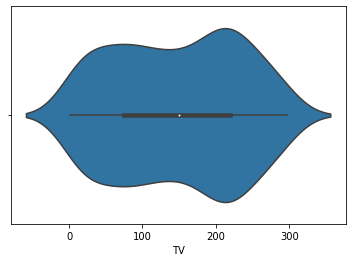

In [19]:
sns.violinplot(x='TV',data=df)
plt.show()

Maximum is distributed between 0 to 300.



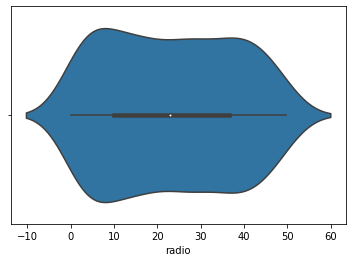

In [20]:
sns.violinplot(x='radio',data=df)
plt.show()

all value are approx. same scale but few are different.



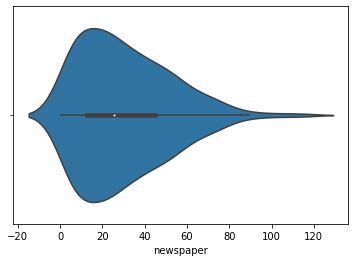

In [21]:
sns.violinplot(x='newspaper',data=df)
plt.show()

Maximum data are present between 0 to 80



# Bivariate Anaysis

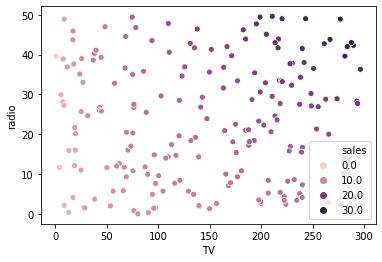

In [22]:
sns.scatterplot(data=df, x="TV", y="radio", hue="sales")

checking relationship between "TV" and "radio" columns and data is highly spreaded.



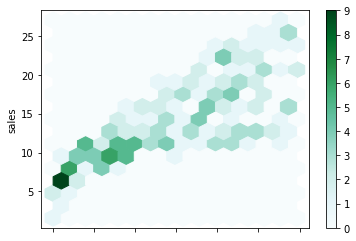

In [23]:
df.plot.hexbin(x='TV', y='sales', gridsize=15)

checking relationship between "TV" and "sales" columns.



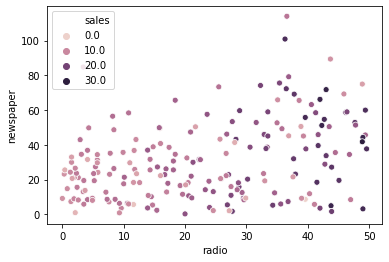

In [24]:
sns.scatterplot(data=df, x="radio", y="newspaper", hue="sales")

Checking relationship between "radio" and "newspaper" columns and the data is spreading.



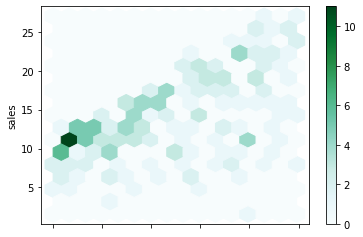

In [25]:
df.plot.hexbin(x='radio', y='sales', gridsize=15)

Checking relationship between "radio" and "sales" columns.



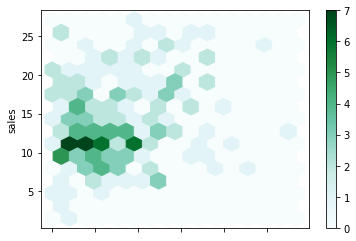

In [26]:
df.plot.hexbin(x='newspaper', y='sales', gridsize=15)

Checking relationship between "newspaper" and "sales"



# Multivariate Anaysis

In [27]:
collist=df.columns.values
ncol=5
nrows=10

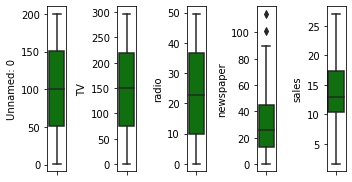

In [28]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green', orient='v')
    plt.tight_layout()

Ploting all columns by Boxplot to find all variable outliers in a one place.



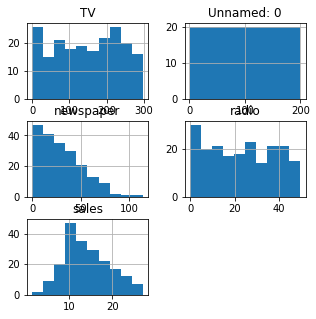

In [29]:
fig = plt.figure(figsize = (5,5))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

Ploting all columns in one place with the help of histplot.



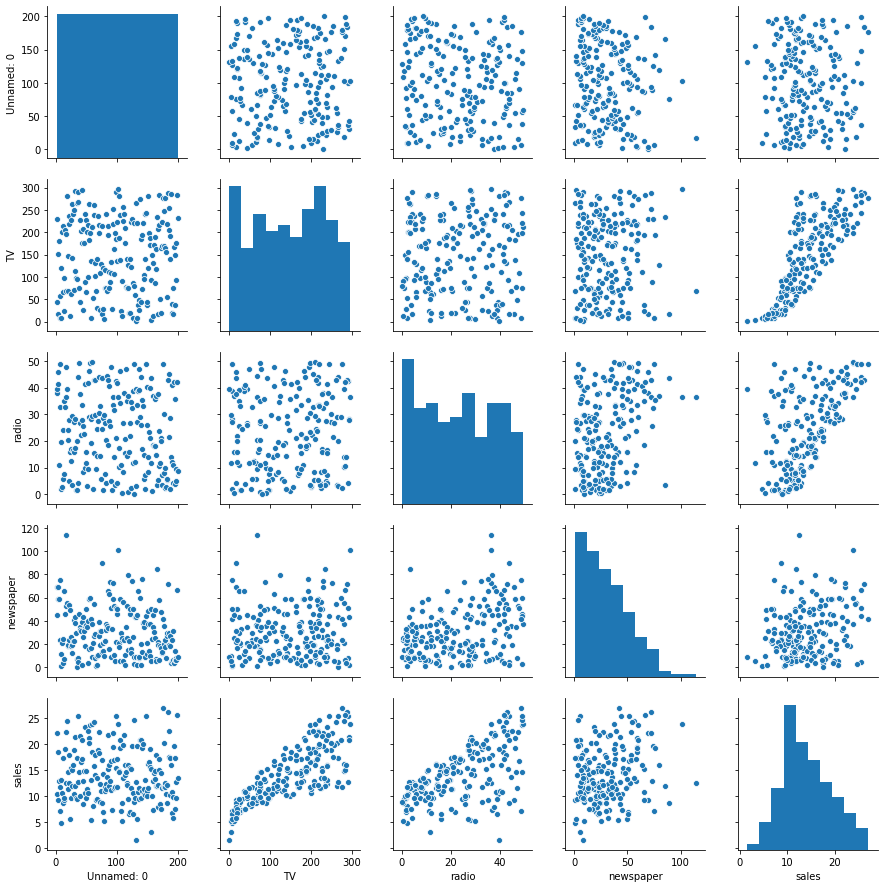

In [30]:
sns.pairplot(df)

# Zscore Value

In [31]:
from scipy.stats import zscore

In [32]:
z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

Applying Zscore functionality on entire data to remove outliers.



In [33]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


Setting threshold point.



In [34]:
z[16][2]

0.9004941997696599

In [35]:
z[101][2]

0.8802371316884585

checking the value wether it is below threshold point or not.



In [36]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


With the help of above functionality we are trying to get all the values that is below from threshold point.


In [37]:
df_new.shape

(198, 5)

In [38]:
#Data loss %:
loss=(200-198)/200 * 100
loss

1.0

1% data loss is acceptable.



In [39]:
AdDF = df_new.copy()

In [40]:
AdDF.shape

(198, 5)

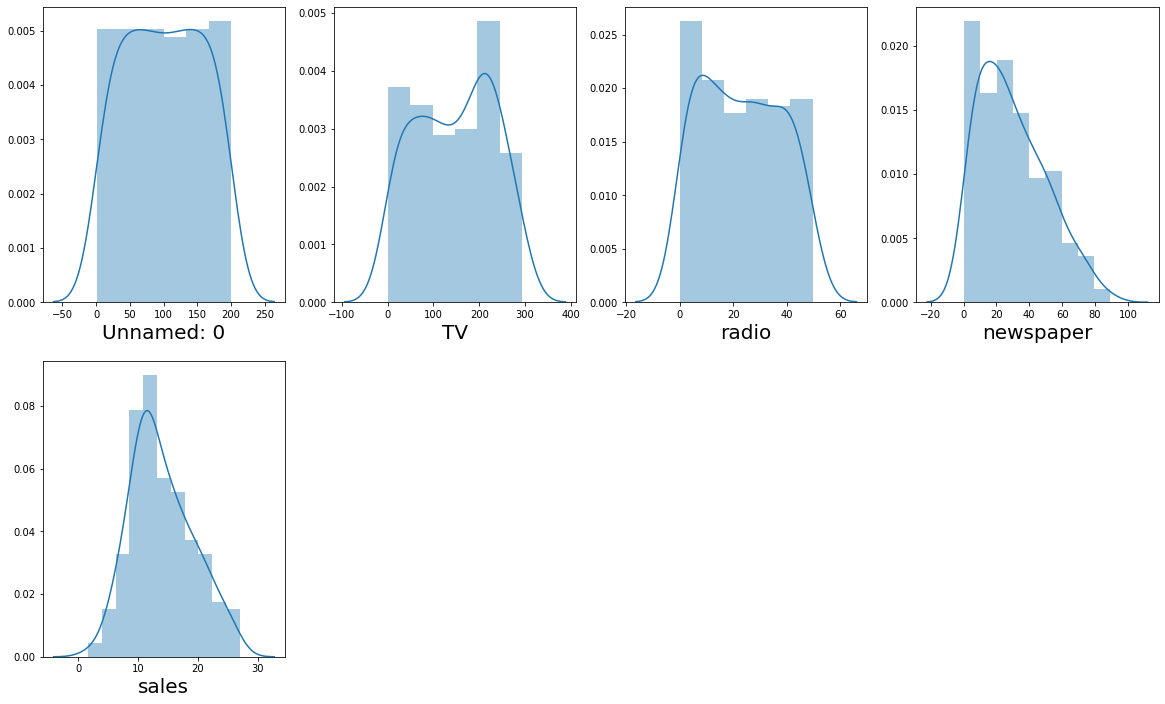

In [41]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in AdDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(AdDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Outlier removal has reduced the Skewness to some extent.



# Skewness

In [42]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

In [43]:
collist=df_new.columns.values
ncol=5
nrows=10

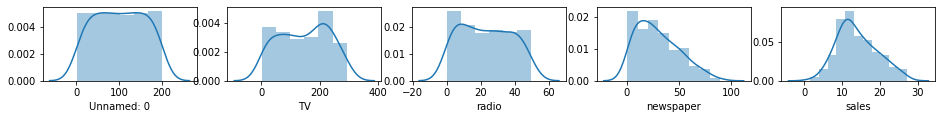

In [44]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol, i+1)
    sns.distplot(df_new[collist[i]])

Outlier removal has reduced the Skewness to some extent.



In [45]:
df_new.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

All Variable already skewed.



# Reducing skewness further

# Normalizing Data Distribution

Replacing 0 values in dataset with their respective column median using Simple Imputer



In [46]:
from sklearn.impute import SimpleImputer

In [47]:
(AdDF == 0).sum()

Unnamed: 0    0
TV            0
radio         1
newspaper     0
sales         0
dtype: int64

In [48]:
si = SimpleImputer(missing_values = 0,strategy = 'most_frequent',verbose = 0 )

Imputing the 0 value with most frequently occuring value in the 'newspaper' column.



In [49]:
feat = ['radio']

In [50]:
Si = si.fit(AdDF[feat])

In [51]:
AdDF[feat] = Si.transform(AdDF[feat])

In [52]:
(AdDF == 0).sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Normalizing Data Distribution using PowerTransformer

In [53]:
from sklearn.preprocessing import PowerTransformer

In [54]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [55]:
skew = ['newspaper']

In [56]:
df4 = AdDF[skew]

In [57]:
df4

,newspaper
0,69.2
1,45.1
2,69.3
3,58.5
4,58.4
...,...
195,13.8
196,8.1
197,6.4
198,66.2


In [58]:
transformed= powtrans.fit_transform(df4)

In [59]:
type(transformed)

numpy.ndarray

In [60]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [61]:
transformed.isnull().sum()

newspaper    0
dtype: int64

In [62]:
transformed.skew()

newspaper   -0.101288
dtype: float64

In [63]:
transformed.index = AdDF.index

In [64]:
AdDF[skew] = transformed[skew]

In [65]:
AdDF.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.119916
newspaper    -0.101288
sales         0.407130
dtype: float64

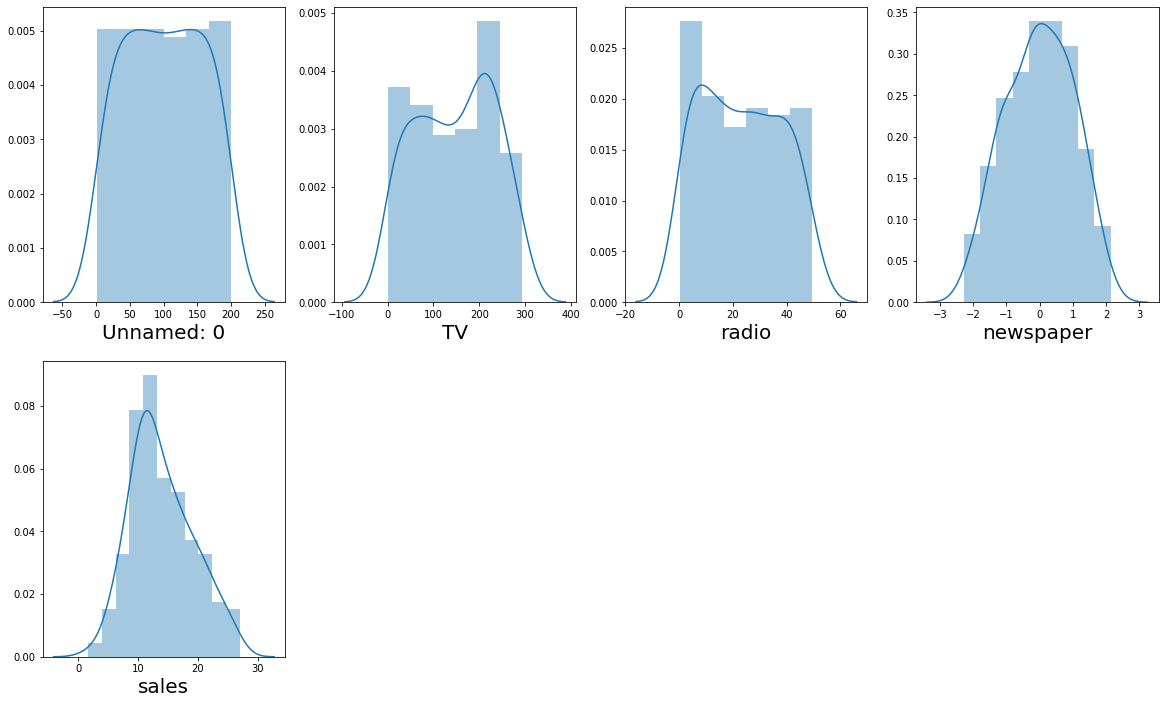

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in AdDF:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(AdDF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Distributions look much more Normalised now

In [67]:
X = AdDF.drop(columns = 'sales')
y = AdDF['sales']

# Feature Selection

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [70]:
scaled_X

array([[-1.73103384e+00,  9.78697339e-01,  9.90094085e-01,
         1.60419650e+00],
       [-1.71370862e+00, -1.19901165e+00,  1.09147939e+00,
         8.31044006e-01],
       [-1.69638341e+00, -1.51933199e+00,  1.53757474e+00,
         1.60705249e+00],
       [-1.67905820e+00,  5.64563564e-02,  1.22665980e+00,
         1.28376774e+00],
       [-1.66173298e+00,  4.00243389e-01, -8.34841434e-01,
         1.28062154e+00],
       [-1.64440777e+00, -1.61906543e+00,  1.74034535e+00,
         1.76610727e+00],
       [-1.62708256e+00, -1.04647815e+00,  6.52143063e-01,
        -1.02053455e-01],
       [-1.60975734e+00, -3.10797368e-01, -2.40047635e-01,
        -8.49688954e-01],
       [-1.59243213e+00, -1.62023876e+00, -1.42287621e+00,
        -2.09866461e+00],
       [-1.57510692e+00,  6.23176960e-01, -1.38908111e+00,
        -2.26499330e-01],
       [-1.55778170e+00, -9.45571378e-01, -1.17279246e+00,
        -6.55338235e-02],
       [-1.54045649e+00,  7.98003813e-01,  5.73492644e-02,
      

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif = pd.DataFrame()

In [73]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [74]:
vif

,Features,vif
0,Unnamed: 0,1.023459
1,TV,1.003570
2,radio,1.103052
3,newspaper,1.109572


There is no multicollinearity.



# Selecting Kbest Features

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

In [76]:
bestfeat = SelectKBest(score_func = f_classif, k = 3)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [77]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(10,'Score'))

      Feature     Score
1          TV  3.672431
2       radio  1.733126
3   newspaper  1.259850
0  Unnamed: 0  0.783511


Retaining all features



# Spliting All data into X and Y(Target Variable)

In [78]:
x=df_new.drop(['sales'],axis=1)
y=df_new['sales']

In [79]:
x.shape

(198, 4)

In [80]:
y.shape

(198,)

Checking shape after spliting x and y.



# Spliting X and y into Train data and Test data for model building.


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

# Model Building

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Linear Regression

In [83]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
lr.coef_

array([-0.00112178,  0.04469462,  0.18227268,  0.01265707])

In [85]:
lr.intercept_

2.8665267285528397

In [86]:
lr.score(x_train,y_train)

0.8899824480755979

In [87]:
pred=lr.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [ 8.71100144 11.88728927 23.34766219  8.85440458 10.50905209 21.53990516
 19.09243091 11.53675934 14.02567518 17.39559915 14.0834489  20.94587202
  8.77472088 12.59861302  6.48196806  9.07926693 10.80353357 12.52753199
  9.65947985 11.39414293 13.13953718 16.79142159 22.95106463  5.99085263
 16.96993989 20.8238379   8.16316166 14.85424496  6.79760417 12.14112917
 17.75295097 13.53923095  6.42389209 14.3911349  15.47234219 17.80498153
 15.1268086  11.65405684 18.32911414 15.95323439 18.99679988 13.11105334
 11.78826169  9.25085233  6.24477602  7.4273243  16.97879104 15.99688323
 11.14754725 22.8008428  16.65835783 13.92972155 18.5513523   5.20306859
  4.56288915 12.30200129  9.65723766 21.62790679 13.66448235 10.66739863
 20.58097802  7.25668627 20.28873428  7.82694565 24.06167707 13.39583252]
Actual Price,y_test


In [88]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error:
Mean absolute error: 1.3553177129605718
Mean squared error: 3.088065584801299
Root Mean Squared error: 1.7572892718051
0.8960139894468448


LinearRegression Algorithm is performing good and the score is 89%

# Random Forest Regressor

In [89]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [90]:
rf.score(x_train,y_train)

0.995819220149587

In [91]:
pred=rf.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')

Predicted Result Price: [ 8.984 13.052 23.062 10.693  5.33  23.622 19.524 12.886 15.146 14.589
 14.378 22.439  5.619 13.502  9.202 10.291  5.474 11.62  10.008 12.039
 12.81  17.902 23.842  7.067 17.068 22.404  7.974 12.14   7.704 12.714
 18.581 14.848  9.349 12.901 12.402 19.358 15.161 12.771 18.949 16.63
 21.561  6.052 13.166 11.015  8.228  7.651 17.607 16.136  9.278 24.756
 18.741 12.811 19.796  8.403  7.862 11.852 11.254 20.511 12.974 12.323
 22.227  9.297 21.201  9.464 24.871 12.054]
Actual Price,y_test


In [92]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error:
Mean absolute error: 0.5364242424242445
Mean squared error: 0.4634562121212153
Root Mean Squared error: 0.6807761835737317
0.9843938021259147


RandomForestRegressor Algorithm is performing Excellent and the score is 98%

# Decision Tree Regressor

In [93]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred=dtc.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [ 8.8 12.9 25.5  8.7  5.3 25.4 19.6 12.4 15.5 14.8 12.9 23.7  5.3 13.2
  9.5 10.6  5.3 11.4  9.6 11.8 14.  17.3 21.7  8.  17.4 21.7  8.  12.3
  8.8 13.4 19.4 15.   9.5 11.8 12.7 19.  15.6 13.4 19.  16.6 22.6  5.6
 12.9 11.3  8.8  8.  19.  17.6  8.5 25.5 18.4 13.4 20.7  5.9  7.3 11.4
 11.  18.9 15.3 14.1 21.7  9.6 22.1  8.7 25.5 11.7]
Actual Price,y_test
error:
Mean absolute error: 0.9500000000000001
Mean squared error: 1.363484848484849
Root Mean Squared error: 1.1676835395280902
0.9540866779056003


DecisionTreeRegressor Algorithm is performing very good and the score is 95%

# XGBRegressor

In [94]:
!pip install xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [95]:
xg = XGBRegressor()
xg.fit(x_train,y_train)
y_xg_pred = xg.predict(x_test)
xg.score(x_train,y_train)
pred=xg.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [ 8.603681  12.37885   22.933119  10.126885   5.853686  22.741652
 19.436014  12.976678  15.098929  14.90808   13.724071  22.968666
  5.5976963 12.89444    9.289227  10.267017   5.5631332 11.378704
  9.774972  11.823603  12.329837  19.013628  24.786543   7.576957
 16.804525  22.069126   8.039576  12.172907   7.8663716 12.461456
 18.7387    15.063081   8.662305  12.225369  12.592611  20.63387
 15.07332   12.460645  18.636385  16.870476  21.946737   6.6500406
 12.307018  11.43267    8.342025   7.7562227 18.550943  15.156149
  8.857545  25.263659  18.588371  12.486233  19.631798   6.6808395
  7.333498  12.067109  11.317435  20.852102  13.656329  12.603554
 22.990171   9.065424  21.0701     9.177002  25.097347  11.733582 ]
Actual Price,y_test
error:
Mean absolute error: 0.6337348721244118
Mean squared error: 0.5705948007614541
Root Mean Squared error: 0.7553772572439907
0.9807860696788362


XGBRegressor Algorithm performing Excellent and the score is 98%

# Support Vector Regression Model

In [96]:
SV= SVR()
SV.fit(x_train,y_train)
y_SV_pred = SV.predict(x_test)
SV.score(x_train,y_train)
pred=SV.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [ 8.5868085  13.40848177 17.59149947 11.07604381  9.61530222 18.05840105
 17.8489107  12.97863069 14.7454242  15.96972644 14.58194733 18.11290542
  8.32052569 13.88730795  9.23880984 11.1340294   9.32368802 15.15155369
  9.56533861 10.94556791 12.09689011 14.81393847 19.04504388  9.01086398
 17.08778499 18.81323463  8.84429039 16.44687574  8.15112119 13.54417759
 17.82759298 13.56039809  9.24687396 11.92373496 15.98372818 14.45319632
 16.10094833 12.89168473 17.50970338 15.58005044 16.48061835  9.89384029
 13.50109006  9.99446499  8.08453291  8.94537036 16.04613445 16.3266108
  9.72149598 17.88233768 15.03967699 16.00424309 17.57546529  8.98339294
  7.61641784 14.67528253 12.00290847 17.19850652 12.36889816 11.35372989
 18.74523596  9.18493246 18.28327113 11.04537341 18.88117323 14.50061011]
Actual Price,y_test
error:
Mean absolute error: 2.0873571842772307
Mean squared error: 7.722430187517608
Root Mean Squared error: 2.7789260852922317
0.7399586618472418


Support Vector Regression Model is performing good and the score is 73%


# Lasso Regression Model

In [97]:
l = Lasso()
l.fit(x_train,y_train)
y_l_pred = l.predict(x_test)
l.score(x_train,y_train)
pred=l.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [ 8.74487398 11.93157185 23.22015877  8.93214321 10.47014095 21.46902375
 19.0457755  11.53855566 14.017644   17.4693562  14.11304242 20.80113274
  8.75142017 12.62142645  6.59851431  9.11945104 10.74409431 12.58980845
  9.68485994 11.40000155 13.08159698 16.77766233 22.82541583  6.07789767
 16.97002675 20.73234678  8.16734922 14.87187266  6.85507484 12.20921252
 17.70184191 13.53563866  6.55164529 14.30986757 15.52866588 17.78195756
 15.13939238 11.74962931 18.25866351 15.976659   18.95416774 12.95812554
 11.83823039  9.31303306  6.30934931  7.48703529 16.89163245 16.02431258
 11.05752052 22.7211559  16.66525624 13.97061414 18.53829863  5.33209811
  4.66664591 12.39813243  9.72427565 21.55951487 13.6163659  10.74675462
 20.48003249  7.34305927 20.20735482  7.90169759 23.94626625 13.49858691]
Actual Price,y_test
error:
Mean absolute error: 1.3509836723911355
Mean squared error: 3.0553178971810264
Root Mean Squared error: 1.7479467661176145
0.8971167190673662


Lasso Regression Model is performing good and the score is 89%


# Ridge Regression Model

In [98]:
r=Ridge()
r.fit(x_train,y_train)
y_r_pred = r.predict(x_test)
r.score(x_train,y_train)
pred=r.predict(x_test)
print('Predicted Result Price:',pred)
print('Actual Price,y_test')
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

Predicted Result Price: [ 8.71095424 11.88734253 23.34757966  8.85453487 10.50898645 21.53966831
 19.09236286 11.53681858 14.02565374 17.39563211 14.08347884 20.94573454
  8.77471654 12.59861976  6.48210405  9.07937561 10.80346463 12.52766095
  9.65944959 11.39409346 13.13949432 16.79128105 22.95095785  5.9909242
 16.96989538 20.8236802   8.16321347 14.8544635   6.79764965 12.14123885
 17.75290793 13.5391682   6.42402363 14.39099849 15.47245597 17.80479613
 15.1268056  11.65413459 18.3291169  15.95319842 18.99659902 13.11096001
 11.78829032  9.25086963  6.24486937  7.42732936 16.97868526 15.99686146
 11.14753488 22.80064638 16.65828912 13.92981586 18.55128209  5.20318175
  4.56303532 12.30209439  9.6573372  21.6278817  13.66442506 10.66741496
 20.58085736  7.2567514  20.28862897  7.82710438 24.06156314 13.39593245]
Actual Price,y_test
error:
Mean absolute error: 1.3553381634480983
Mean squared error: 3.0881181519573735
Root Mean Squared error: 1.7573042286290026
0.8960122193261346


Ridge Regression Model is performing good and the score is 89%

# Cross Validation

In [99]:
from sklearn.model_selection import cross_val_score

In [100]:
from sklearn.linear_model import ElasticNet

In [101]:
Enr=ElasticNet(alpha=0.0001)
Enr.fit(x_train,y_train)
Enrpred=Enr.predict(x_test)
print(Enr.score(x_train,y_train))
Enr.coef_

0.8899824480750542


array([-0.00112177,  0.04469461,  0.18227249,  0.01265701])

In [102]:
# Random Forest Regressor
print(cross_val_score(rf,x,y,cv=5).mean())

0.9718263814472404


In [103]:
# Decision Tree Regressor

dtcscore=cross_val_score(dtc,x,y,cv=5)
print(dtcscore)
print(dtcscore.mean(),dtcscore.std())

[0.9641674  0.95590922 0.92220578 0.92897699 0.96089354]
0.9464305846267586 0.01734984504770839


In [104]:
# Linear Regression 
cross_val_score(lr,scaled_X,y,cv=5).mean()

0.8836182894637883

In [105]:
# Ridge Regression Model 
cross_val_score(r,scaled_X,y,cv=5).mean()

0.8837202477444203

In [106]:
# Lasso Regression Model 
cross_val_score(l,scaled_X,y,cv=5).mean()

0.8168183052726793

In [107]:
# XGBRegressor
cross_val_score(xg,scaled_X,y,cv=5).mean()

0.9665599384378953

In [108]:
# Support Vector Regression Model
cross_val_score(SV,scaled_X,y,cv=5).mean()

0.8184326642679786

Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor and XGB Regressor is the best model.

# Hyper Parameter Tuning

In [109]:
#XGB Regressor

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [112]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [113]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [114]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.2,
 'max_depth': 20,
 'min_child_weight': 3,
 'subsample': 0.5}

In [115]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1, max_depth= 20, min_child_weight = 0,subsample = 0.5)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=20,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
xgbpred = Best_mod.predict(x_test)
acc = r2_score(y_test,xgbpred)
print(acc*100)

98.39250131734451


XGB Regressor has an accuracy of 98.39%

# Random Forest Regressor

In [117]:
parameters = {'n_estimators':[30,60],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [118]:
GridCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5,n_jobs = -1,verbose = 1)

In [119]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [120]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 30}

In [121]:
Best_mod2 = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)

In [122]:
Best_mod2.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=60)

In [123]:
rfpred = Best_mod2.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)

96.91652728226117


Random Forest Regressor has an accuracy of 97.13%

# Saving The Model

In [124]:
import joblib
joblib.dump(Best_mod,"BestModelAd.pkl")

['BestModelAd.pkl']

# Loading The Model

In [125]:
mod=joblib.load("BestModelAd.pkl")

In [126]:
print(mod.predict(x_test))

[ 8.809694  12.926282  22.46493   10.54875    5.5639286 23.530022
 19.579235  12.852889  15.136398  14.610943  14.574677  20.890213
  5.630157  13.735219   9.156973  10.805895   5.8040357 11.436551
  9.648084  12.742908  12.228628  17.476225  24.057026   7.1147423
 16.705582  22.175467   7.4687996 12.192889   7.6411157 12.283889
 18.252167  14.483445   8.868662  13.1288805 12.152536  19.774305
 15.252647  11.89879   19.29374   16.530855  21.358164   8.043854
 12.803522  10.558071   8.284443   7.207305  17.419111  16.020483
  9.319014  24.020561  18.499432  12.97337   19.56906    7.9483013
  7.4054437 11.328558  10.996786  20.152788  13.575672  12.292555
 22.07177    9.304884  20.655428   9.54821   24.782387  11.690586 ]
